In [1]:
%matplotlib inline
from d2l import torch as d2l

In [3]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)
rnn = d2l.RNNScratch(num_inputs=len(data.vocab), num_hiddens=32)
model = d2l.RNNLMScratch(rnn, vocab_size=len(data.vocab), lr=1)

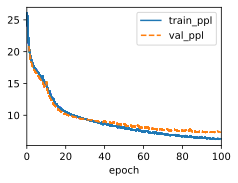

In [4]:
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [6]:
model.predict("then he said", 20, data.vocab, d2l.try_gpu())

'then he said the that the that o'